In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [2]:
df = pd.read_csv('/content/AB_Test_Results.csv')

# Data Understanding

In [6]:
#TODO : compute the following : DataFrame Information, Columns in DataFrame, Counting Missing Values,
# Descriptive Statistics, Value Counts for VARIANT_NAME, Counting Unique Users in USER_ID

print('=' * 70)
print(df.info())
print('=' * 70)
print(df.columns)
print('=' * 70)
print(df.isna().sum())
print('=' * 70)
print(df.describe())
print('=' * 70)
print(df['VARIANT_NAME'].value_counts())
print('=' * 70)
print(df['USER_ID'].nunique())
print('=' * 70)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB
None
Index(['USER_ID', 'VARIANT_NAME', 'REVENUE'], dtype='object')
USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64
            USER_ID       REVENUE
count  10000.000000  10000.000000
mean    4981.080200      0.099447
std     2890.590115      2.318529
min        2.000000      0.000000
25%     2468.750000      0.000000
50%     4962.000000      0.000000
75%     7511.500000      0.000000
max    10000.000000    196.010000
VARIANT_NAME
variant    5016
control    4984
Name: count, dtype: int64
6324


# Average Revenue by VARIANT_NAME

In [15]:
user_rev = df.groupby(['USER_ID', 'VARIANT_NAME'])['REVENUE'].sum().reset_index()

rev_aver_vn = user_rev.groupby('VARIANT_NAME')['REVENUE'].mean()
rev_aver_vn

,REVENUE
VARIANT_NAME,
control,0.163572
variant,0.089342


In [18]:
v_counts = df.groupby('USER_ID')['VARIANT_NAME'].nunique()
clean_user_ids = v_counts[v_counts == 1].index
df_final = df[df['USER_ID'].isin(clean_user_ids)]
df_final = df_final[df_final['USER_ID'] != 3342]
df_final.sort_values(by = 'REVENUE', ascending = False)


,USER_ID,VARIANT_NAME,REVENUE
8168,2166,control,29.32
2482,7356,variant,23.04
6412,1053,control,20.07
5217,3684,variant,19.47
5530,282,control,18.56
...,...,...,...
3400,9003,variant,0.00
3401,9902,variant,0.00
3403,4863,control,0.00
3404,1807,control,0.00


What if H0: M1 = M2 ?
What about H1: M1 != M2 ?

# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

In [19]:
# TODO : test the normality of revenue data in two groups (variant and control) within your DataFrame df using the Shapiro-Wilk test, what can you conclude ?

control_revenue = df_final[df_final['VARIANT_NAME'] == 'control']['REVENUE']
variant_revenue = df_final[df_final['VARIANT_NAME'] == 'variant']['REVENUE']


st_control, p_control = shapiro(control_revenue)
st_variant, p_variant = shapiro(variant_revenue)

print(f"Control Group: Statistics={st_control:.4f}, p-value={p_control:.4f}")
print(f"Variant Group: Statistics={st_variant:.4f}, p-value={p_variant:.4f}")

Control Group: Statistics=0.0622, p-value=0.0000
Variant Group: Statistics=0.0510, p-value=0.0000


In [21]:
# TODO : test for the homogeneity of variances between two groups (variant and control) within your DataFrame df using the Levene's test,  what can you conclude ?

stat, p_value = levene(control_revenue, variant_revenue)

print(f"Statistics: {stat}, p-value: {p_value}")

Statistics: 1.8703041860181113, p-value: 0.17149090193725022


# Non-Parametric Test (mannwhitneyu Test)

In [22]:
# TODO : perform the Mann-Whitney U test for comparing the average revenue between the variant and control groups in your DataFrame, what can you conclude ?

mwu = mannwhitneyu(control_revenue, variant_revenue, use_continuity=False, alternative="two-sided")

print("- Mann-Whitney U test:")
print(f"   - U value: {mwu.statistic:.3f}")
print(f"   - p-value: {mwu.pvalue:.4f}")

- Mann-Whitney U test:
   - U value: 4619788.000
   - p-value: 0.2860


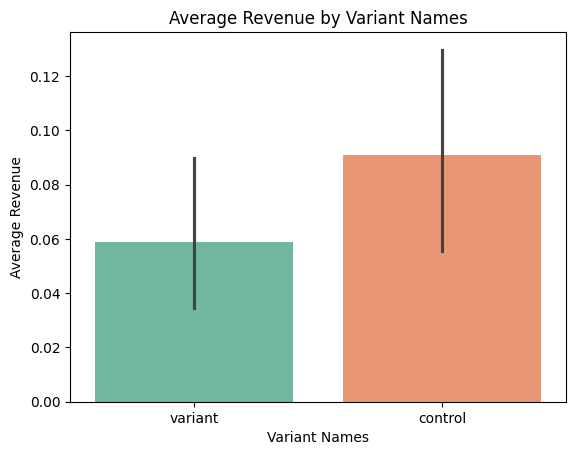

In [26]:
# TODO : create a bar plot showing the average revenues by variant names using the seaborn library

sns.barplot(x = 'VARIANT_NAME', y = 'REVENUE', data = df_final, palette = 'Set2', hue = 'VARIANT_NAME', legend = False)
plt.title('Average Revenue by Variant Names')
plt.xlabel('Variant Names')
plt.ylabel('Average Revenue')
plt.show()